#  Feature Selection - With Correletion

### In this step we will be removing the features which are highly correlated

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# If a independentent feature is highly corelated with dependent feature , we should keep that kind of features 
# Suppose we have 3 features with are highly corelated with each other (more than 90%) then from this 3 I will be using just 1
# In this way we can remove the features



In [2]:
# Loading the dataset
df=pd.read_csv('boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
x=df.drop('Price',axis=1)
y=df['Price']

In [4]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [5]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [6]:
#To prevent the over fitting part we are doing the train test split 
# split the data into training and test dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=0)

x_train.shape, x_test.shape
# whatever we do on the test data , we will do it on the train data
# If any features get removed in x_train , It will be automatically get removed from x_test

((354, 13), (152, 13))

In [7]:
x_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


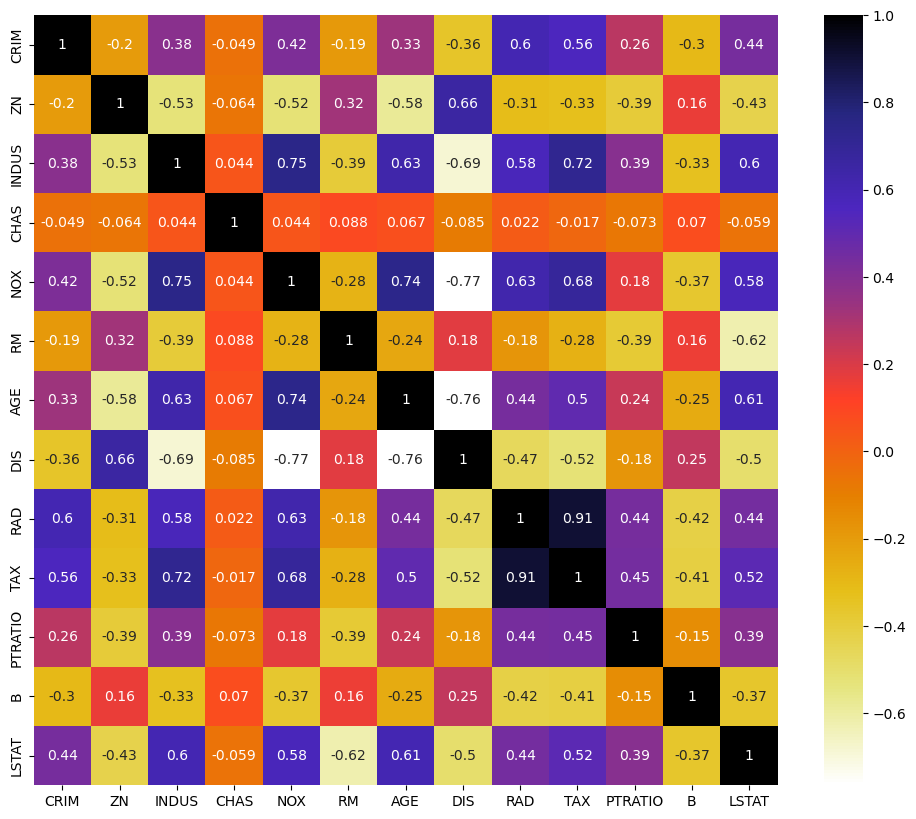

In [9]:
# Using Pearson correlation
import seaborn as sns
plt.figure(figsize=(12,10)) # 12*10 ( small box sizes)
cor = x_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r) # remove and see the changes
plt.show()
# 1 is highly corelated
#-0.6 is least corelated 
# here we see that rad to tax corelation is 91% so 1 feature can be dropped( if I keep threshold value as 90 )


In [10]:
# With the following function we can select highly corelated features
# It will remove the first feature that is corelated with anything other feature
# create a corelation function
# if it is 70 or 80 percent corelated we will remove the features
# i may be row and j may be column 

def correlation(dataset,threshold):
    col_corr = set() # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold: # ( we are going to compare with each and every row and column ) we are interested in absolute coeff value
                colname = corr_matrix.columns[i] # (store it in column name) getting the name of the column
                col_corr.add(colname) # store it in set , so that no duplicate entry
    return col_corr
# if abs(corr_matrix.iloc[i,j]) > threshold: - if i donnot use abs(absolute) , thewe will not get negative correlation


In [11]:
corr_features = correlation(x_train,0.7) 
len(set(corr_features))
# these are highly corelated data
# here we are getting 4 features , we will remove the 4 features from x train as well as x test  
# To prevent over fitting

3

In [39]:
# these are the highly corelated features
corr_features # check the table with respect to the features
# remove the features
# either we are using tax or rax, we using rax and removing tax
# we are also removing the negative highly corelated value

{'AGE', 'NOX', 'TAX'}

In [12]:
# Drop the features
x_train.drop(corr_features, axis=1)
x_test.drop(corr_features, axis=1)

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0,6.333,5.2146,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0,6.216,1.1691,24,20.2,366.15,9.53
219,0.11425,0.0,13.89,1,6.373,3.3633,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0,5.349,1.7028,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0,6.232,5.0141,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0,7.147,6.0622,3,18.7,396.90,5.33
428,7.36711,0.0,18.10,0,6.193,1.9356,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0,5.277,1.4261,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0,6.635,3.3175,4,18.4,396.90,4.54


In [41]:
# storing the data
x_train=x_train.drop(corr_features, axis=1)
x_test=x_test.drop(corr_features, axis=1)


In [42]:
x_train.shape,x_test.shape

((354, 10), (152, 10))